#**FIRST WE IMPORTED SOME LIBRARIES, LOADED THE DATASET AND EXAMINED ITS STRUCTURE**

DATA SOURCE : https://www.visualcrossing.com/weather/weather-data-services

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [3]:
# Load the dataset
file_path = 'Lagos_weather_data_final.xlsx'
lwd = pd.read_excel(file_path)
lwd.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,Lagos,2004-05-13,31.7,28.2,30.0,38.9,32.6,35.8,24.9,74.7,...,NaN,2004-05-13T06:30:34,2004-05-13T18:55:02,0.80,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,2004-05-14,26.6,25.7,26.3,26.6,25.7,26.3,25.9,97.5,...,NaN,2004-05-14T06:30:27,2004-05-14T18:55:10,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,Lagos,2004-05-15,25.1,25.1,25.1,25.1,25.1,25.1,25.1,100.0,...,NaN,2004-05-15T06:30:20,2004-05-15T18:55:18,0.87,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
3,Lagos,2004-05-16,22.9,22.9,22.9,22.9,22.9,22.9,22.2,95.8,...,NaN,2004-05-16T06:30:14,2004-05-16T18:55:27,0.90,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,Lagos,2004-05-17,31.4,25.1,28.6,38.7,25.1,33.6,25.5,84.2,...,NaN,2004-05-17T06:30:08,2004-05-17T18:55:36,0.94,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


##**EDA**

In [4]:
lwd.isnull().sum()

name                   0
datetime               0
tempmax              336
tempmin              336
temp                 336
feelslikemax         336
feelslikemin         336
feelslike            336
dew                  336
humidity             336
precip               336
precipprob           336
precipcover            0
preciptype          4017
flood occurrence    3876
windgust            1937
windspeed            366
winddir              714
sealevelpressure     521
cloudcover           336
visibility           537
solarradiation      2425
solarenergy         2425
uvindex             2425
severerisk          6451
sunrise              366
sunset               366
moonphase            366
conditions           692
description          692
icon                 692
stations             692
windspeedmax        6991
windspeedmin        6991
dtype: int64

In [5]:
lwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              7357 non-null   object        
 1   datetime          7357 non-null   datetime64[ns]
 2   tempmax           7021 non-null   float64       
 3   tempmin           7021 non-null   float64       
 4   temp              7021 non-null   float64       
 5   feelslikemax      7021 non-null   float64       
 6   feelslikemin      7021 non-null   float64       
 7   feelslike         7021 non-null   float64       
 8   dew               7021 non-null   float64       
 9   humidity          7021 non-null   float64       
 10  precip            7021 non-null   float64       
 11  precipprob        7021 non-null   float64       
 12  precipcover       7357 non-null   float64       
 13  preciptype        3340 non-null   object        
 14  flood occurrence  3481 n

In [6]:
lwd.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

#**NEXT WE CLEANED THE DATA AND FILLED MISSING VALUES**

In [7]:
weather_df = lwd.filter(['datetime','precip','precipprob',  'precipcover', 'preciptype','windgust', 'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp','dew', 'humidity', 'sealevelpressure', 'moonphase', 'flood_occurence'] , axis=1)
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,2004-05-13,0.0,0.0,0.0,NaN,NaN,20.5,128.2,31.7,28.2,30.0,24.9,74.7,NaN,0.80
1,2004-05-14,0.0,0.0,0.0,NaN,NaN,20.5,280.4,26.6,25.7,26.3,25.9,97.5,NaN,0.83
2,2004-05-15,0.0,0.0,0.0,NaN,NaN,16.6,180.0,25.1,25.1,25.1,25.1,100.0,NaN,0.87
3,2004-05-16,0.0,0.0,0.0,NaN,NaN,11.2,350.0,22.9,22.9,22.9,22.2,95.8,NaN,0.90
4,2004-05-17,0.0,0.0,0.0,NaN,NaN,31.3,242.3,31.4,25.1,28.6,25.5,84.2,NaN,0.94


In [8]:
weather_df.preciptype.fillna('no_rain', inplace=True)
weather_df.head()

C:\Users\Regina Rukeme Agaren\AppData\Local\Temp\ipykernel_1824\2818322888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df.preciptype.fillna('no_rain', inplace=True)


,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,2004-05-13,0.0,0.0,0.0,no_rain,NaN,20.5,128.2,31.7,28.2,30.0,24.9,74.7,NaN,0.80
1,2004-05-14,0.0,0.0,0.0,no_rain,NaN,20.5,280.4,26.6,25.7,26.3,25.9,97.5,NaN,0.83
2,2004-05-15,0.0,0.0,0.0,no_rain,NaN,16.6,180.0,25.1,25.1,25.1,25.1,100.0,NaN,0.87
3,2004-05-16,0.0,0.0,0.0,no_rain,NaN,11.2,350.0,22.9,22.9,22.9,22.2,95.8,NaN,0.90
4,2004-05-17,0.0,0.0,0.0,no_rain,NaN,31.3,242.3,31.4,25.1,28.6,25.5,84.2,NaN,0.94


In [9]:
median = weather_df.windgust.median()

In [10]:
 weather_df.windgust.fillna(median, inplace=True)

C:\Users\Regina Rukeme Agaren\AppData\Local\Temp\ipykernel_1824\1713063592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df.windgust.fillna(median, inplace=True)


In [11]:
median = weather_df.sealevelpressure.median()
median

1011.9

In [12]:
 weather_df.sealevelpressure.fillna(median, inplace=True)

C:\Users\Regina Rukeme Agaren\AppData\Local\Temp\ipykernel_1824\692139273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df.sealevelpressure.fillna(median, inplace=True)


In [13]:
weather_df.isnull().sum()

datetime              0
precip              336
precipprob          336
precipcover           0
preciptype            0
windgust              0
windspeed           366
winddir             714
tempmax             336
tempmin             336
temp                336
dew                 336
humidity            336
sealevelpressure      0
moonphase           366
dtype: int64

In [14]:
flood_occurrence = lwd['flood occurrence']
flood_occurrence.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: flood occurrence, dtype: float64

In [15]:
weather_df.dropna(inplace=True)
weather_df.shape

(6643, 15)

In [16]:
weather_df.isnull().sum()

datetime            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
sealevelpressure    0
moonphase           0
dtype: int64

In [17]:
weather_df['flood_occurrence'] = flood_occurrence
weather_df.shape

(6643, 16)

In [18]:
flood_occurrence.fillna(0, inplace = True)
weather_df.isnull().sum()

datetime               0
precip                 0
precipprob             0
precipcover            0
preciptype             0
windgust               0
windspeed              0
winddir                0
tempmax                0
tempmin                0
temp                   0
dew                    0
humidity               0
sealevelpressure       0
moonphase              0
flood_occurrence    3164
dtype: int64

In [19]:
weather_df['flood_occurrence'].value_counts()

flood_occurrence
0.0    3436
1.0      43
Name: count, dtype: int64

#**OUR NEXT STEP WAS FEATURE ENGINEERING**

In [20]:
datetime = pd.to_datetime(weather_df['datetime'])

In [21]:
weather_df['year'] = datetime.dt.year
weather_df['month'] = datetime.dt.month
weather_df['day'] = datetime.dt.day
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurrence,year,month,day
0,2004-05-13,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,NaN,2004,5,13
1,2004-05-14,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,NaN,2004,5,14
2,2004-05-15,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,NaN,2004,5,15
3,2004-05-16,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,NaN,2004,5,16
4,2004-05-17,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,NaN,2004,5,17


#**WE ALSO RAN AND VISUALIZED A CORRELATION MATRIX OF NUMERIC VALUES TO HELP US AVOID COLINEALITY**

In [22]:
corr = weather_df.corr(numeric_only=True)

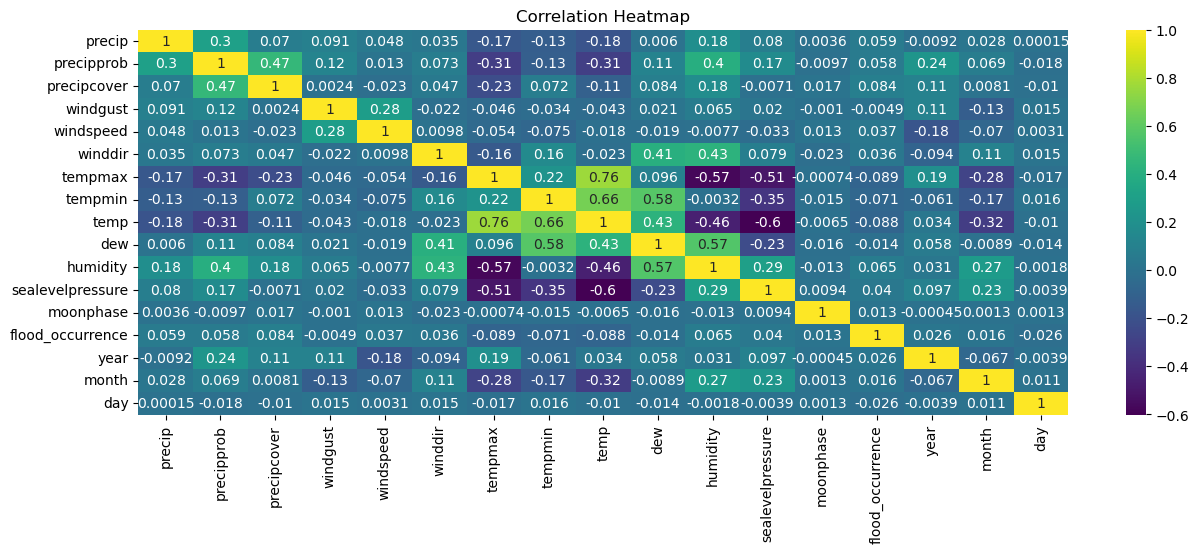

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'corr' is your correlation matrix
plt.figure(figsize=(15, 5))
plt.title('Correlation Heatmap')
heatmap = sns.heatmap(corr, cmap='viridis', annot=True)

# Save the figure as a PNG file
plt.savefig('correlation_heatmap.png')  # Save as PNG file

# Show the plot (optional)
plt.show()

#**This heatmap helps us understand which weather factors are most closely linked to flooding.**

In [24]:
weather_df.flood_occurrence.replace(0, 'no_flood', inplace=True)
weather_df.flood_occurrence.replace(1, 'flood', inplace=True)

C:\Users\Regina Rukeme Agaren\AppData\Local\Temp\ipykernel_1824\4014905822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df.flood_occurrence.replace(0, 'no_flood', inplace=True)


In [25]:
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurrence,year,month,day
0,2004-05-13,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,NaN,2004,5,13
1,2004-05-14,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,NaN,2004,5,14
2,2004-05-15,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,NaN,2004,5,15
3,2004-05-16,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,NaN,2004,5,16
4,2004-05-17,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,NaN,2004,5,17


In [26]:
flood_occurrence.fillna(0.0, inplace = True)

In [27]:
weather_df.fillna(0.0, inplace = True)

In [28]:
weather_df.flood_occurrence.replace(0, 'no_flood', inplace=True)
weather_df.flood_occurrence.replace(1, 'flood', inplace=True)

C:\Users\Regina Rukeme Agaren\AppData\Local\Temp\ipykernel_1824\4014905822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df.flood_occurrence.replace(0, 'no_flood', inplace=True)
C:\Users\Regina Rukeme Agaren\AppData\Local\Temp\ipykernel_1824\4014905822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [29]:
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurrence,year,month,day
0,2004-05-13,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,no_flood,2004,5,13
1,2004-05-14,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,no_flood,2004,5,14
2,2004-05-15,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,no_flood,2004,5,15
3,2004-05-16,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,no_flood,2004,5,16
4,2004-05-17,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,no_flood,2004,5,17


#**WE EXTRATED VALUES FOR ONLY THE DAYS IT FLOODED SO WE COULD SHOW THE OCCURRENCE OF FLOOD BY YEAR**

In [30]:
flood_df = weather_df[weather_df['flood_occurrence'] == 'flood']
flood_df

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurrence,year,month,day
92,2004-08-13,0.0,0.0,0.00,no_rain,28.1,33.5,232.3,27.1,22.6,25.4,22.3,83.6,1014.9,0.92,flood,2004,8,13
394,2005-06-11,145.0,100.0,8.33,rain,28.1,18.4,279.5,28.1,22.1,23.8,22.9,95.1,1012.3,0.15,flood,2005,6,11
395,2005-06-12,34.0,100.0,4.17,rain,28.1,22.3,340.0,24.9,22.7,23.6,23.2,98.1,1011.9,0.18,flood,2005,6,12
451,2005-08-07,0.0,0.0,0.00,no_rain,28.1,29.5,247.3,26.1,24.1,25.1,22.1,83.5,1014.3,0.08,flood,2005,8,7
2230,2010-06-21,17.1,100.0,100.00,rain,28.1,18.7,224.1,27.6,27.1,27.3,24.7,85.9,1011.9,0.32,flood,2010,6,21
2614,2011-07-10,1.0,100.0,4.17,rain,25.9,29.5,229.9,26.0,22.0,24.2,23.3,95.0,1014.2,0.33,flood,2011,7,10
3350,2013-07-15,0.1,100.0,4.17,rain,24.1,14.8,230.2,28.1,24.0,25.6,24.1,91.6,1015.0,0.25,flood,2013,7,15
4804,2017-07-08,18.1,100.0,8.33,rain,25.9,14.8,247.9,25.1,24.0,24.6,23.8,95.5,1015.2,0.48,flood,2017,7,8
5068,2018-03-29,3.5,100.0,25.00,rain,30.6,18.4,206.6,35.0,26.6,28.4,25.2,83.6,1009.8,0.43,flood,2018,3,29
5356,2019-01-11,0.0,0.0,0.00,no_rain,27.0,20.5,186.4,35.0,25.0,28.9,25.0,81.1,1011.0,0.18,flood,2019,1,11


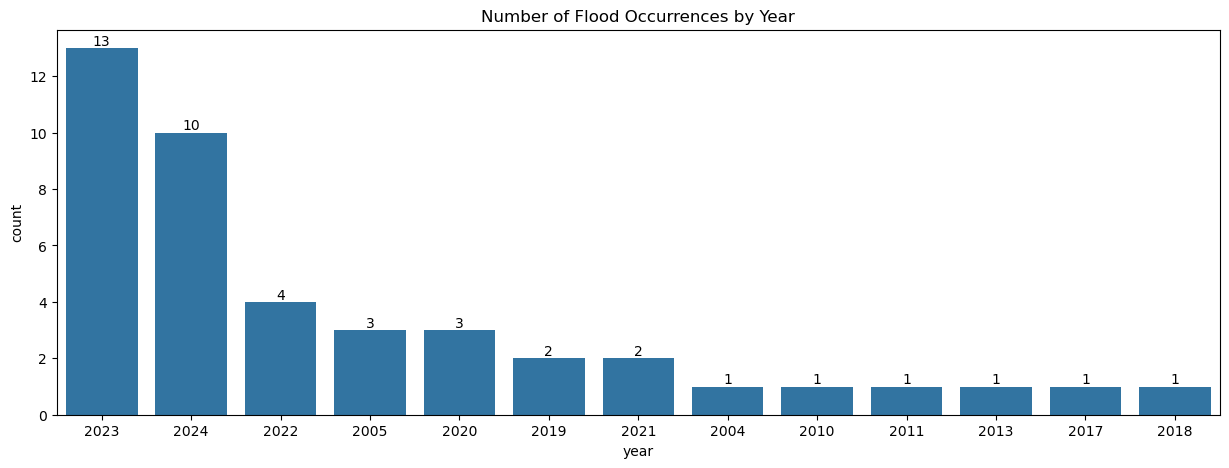

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'flood_df' is your dataframe containing flood occurrence data
plt.figure(figsize=(15, 5))
plt.title('Number of Flood Occurrences by Year')

# Create the countplot
ax = sns.countplot(x='year', data=flood_df, order=flood_df['year'].value_counts().index)

# Add data labels
for patch in ax.patches:
    # Get the height of each bar (i.e., the count)
    count = int(patch.get_height())
    # Get the x and y coordinates to place the label
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    # Add the label to the bar
    ax.annotate(f'{count}', (x, y), ha='center', va='bottom', fontsize=10, color='black')

# Save the figure as a PNG file
plt.savefig('flood_occurrences_by_year.png')  # Save as PNG file

# Show the plot (optional)
plt.show()


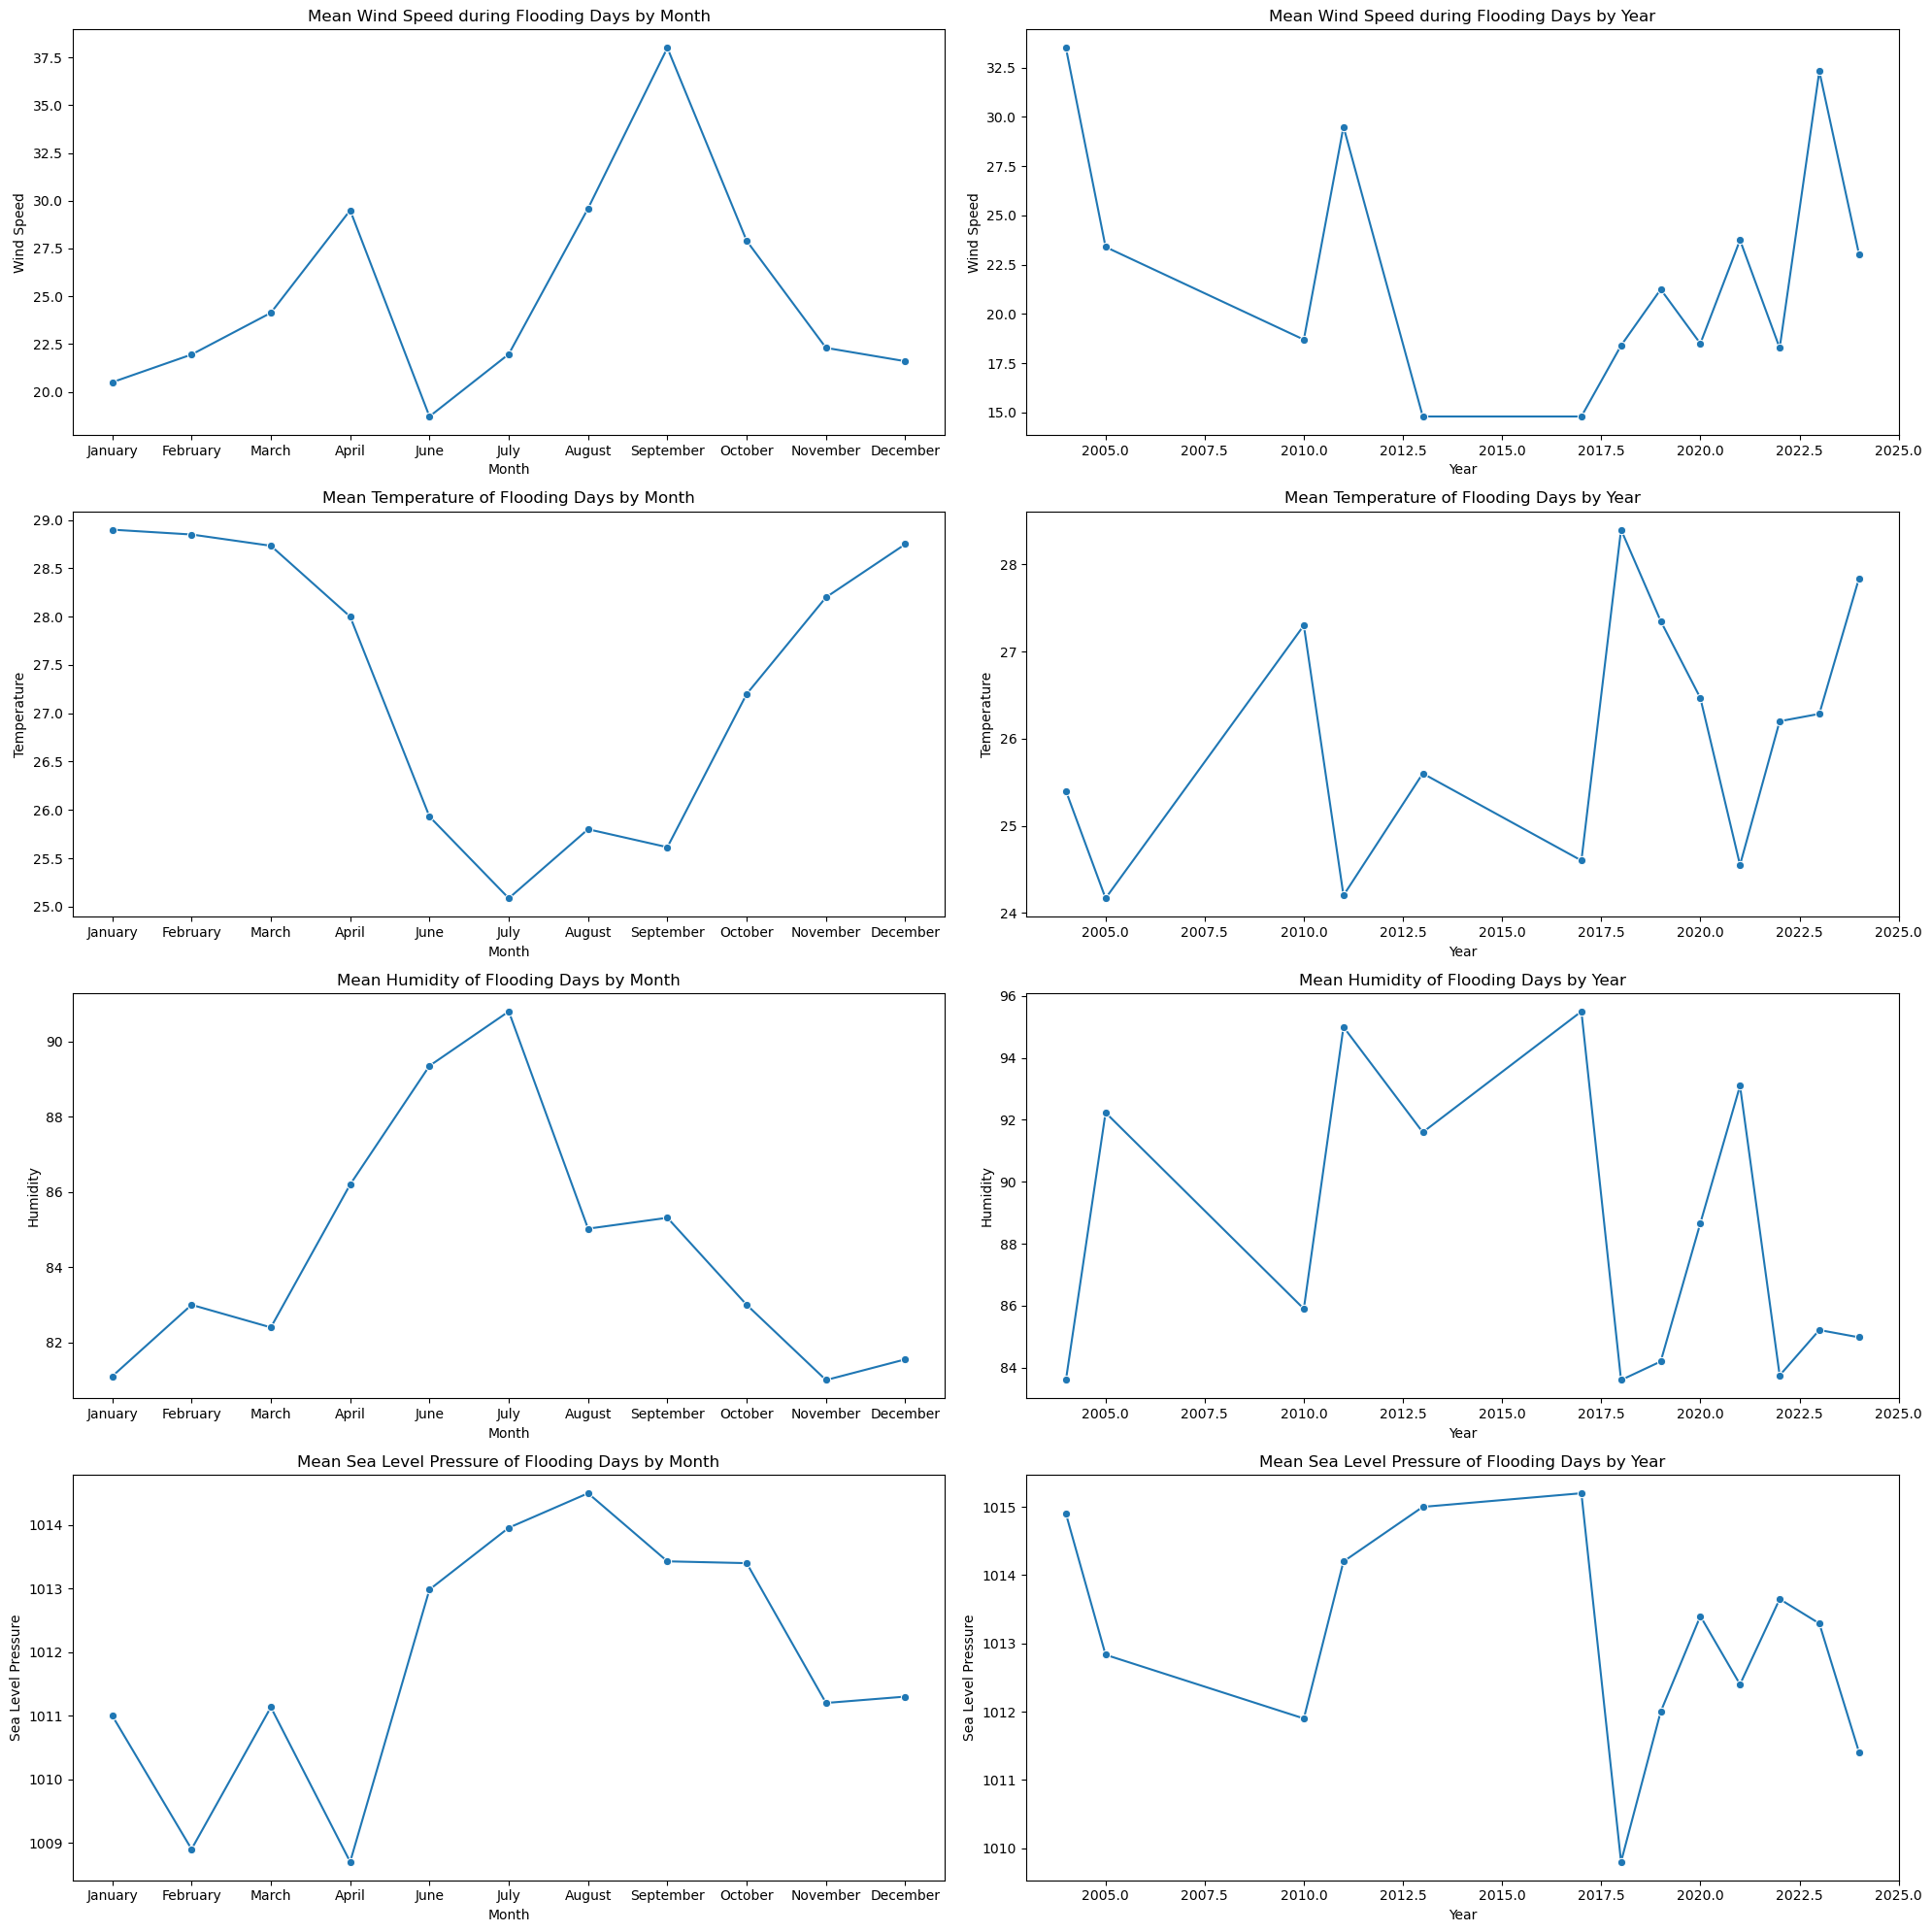

In [32]:
import calendar

# Define a function to save plots
def save_plot(fig, filename):
    fig.savefig(filename, bbox_inches='tight')

# Map months to their names
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

# Create a figure and a grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows and 2 columns

# Plot Mean Wind Speed during Flooding Days by Month
x = flood_df.groupby("month")["windspeed"].mean()
sns.lineplot(x=[month_names[i] for i in x.index], y=x.values, ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Mean Wind Speed during Flooding Days by Month')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Wind Speed')

# Plot Mean Wind Speed during Flooding Days by Year
x = flood_df.groupby("year")["windspeed"].mean()
sns.lineplot(x=x.index.astype(int), y=x.values, ax=axs[0, 1], marker='o')
axs[0, 1].set_title('Mean Wind Speed during Flooding Days by Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Wind Speed')

# Plot Mean Temperature of Flooding Days by Month
x = flood_df.groupby("month")["temp"].mean()
sns.lineplot(x=[month_names[i] for i in x.index], y=x.values, ax=axs[1, 0], marker='o')
axs[1, 0].set_title('Mean Temperature of Flooding Days by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Temperature')

# Plot Mean Temperature of Flooding Days by Year
x = flood_df.groupby("year")["temp"].mean()
sns.lineplot(x=x.index.astype(int), y=x.values, ax=axs[1, 1], marker='o')
axs[1, 1].set_title('Mean Temperature of Flooding Days by Year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Temperature')

# Plot Mean Humidity of Flooding Days by Month
x = flood_df.groupby("month")["humidity"].mean()
sns.lineplot(x=[month_names[i] for i in x.index], y=x.values, ax=axs[2, 0], marker='o')
axs[2, 0].set_title('Mean Humidity of Flooding Days by Month')
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('Humidity')

# Plot Mean Humidity of Flooding Days by Year
x = flood_df.groupby("year")["humidity"].mean()
sns.lineplot(x=x.index.astype(int), y=x.values, ax=axs[2, 1], marker='o')
axs[2, 1].set_title('Mean Humidity of Flooding Days by Year')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Humidity')

# Plot Mean Sea Level Pressure of Flooding Days by Month
x = flood_df.groupby("month")["sealevelpressure"].mean()
sns.lineplot(x=[month_names[i] for i in x.index], y=x.values, ax=axs[3, 0], marker='o')
axs[3, 0].set_title('Mean Sea Level Pressure of Flooding Days by Month')
axs[3, 0].set_xlabel('Month')
axs[3, 0].set_ylabel('Sea Level Pressure')

# Plot Mean Sea Level Pressure of Flooding Days by Year
x = flood_df.groupby("year")["sealevelpressure"].mean()
sns.lineplot(x=x.index.astype(int), y=x.values, ax=axs[3, 1], marker='o')
axs[3, 1].set_title('Mean Sea Level Pressure of Flooding Days by Year')
axs[3, 1].set_xlabel('Year')
axs[3, 1].set_ylabel('Sea Level Pressure')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure
save_plot(fig, 'combined_visuals.png')

# Show the plots
plt.show()

#**This chart shows that wind speeds tend to be higher in certain months, which could contribute to flooding**

#**CATEGORICAL ENCODING**

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
weather_df['preciptype'] = encoder.fit_transform(weather_df['preciptype'])
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurrence,year,month,day
0,2004-05-13,0.0,0.0,0.0,0,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,no_flood,2004,5,13
1,2004-05-14,0.0,0.0,0.0,0,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,no_flood,2004,5,14
2,2004-05-15,0.0,0.0,0.0,0,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,no_flood,2004,5,15
3,2004-05-16,0.0,0.0,0.0,0,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,no_flood,2004,5,16
4,2004-05-17,0.0,0.0,0.0,0,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,no_flood,2004,5,17


#**FEATURE SCALING**

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'precip',	'precipprob',	'precipcover']
weather_df[cols_to_scale] = scaler.fit_transform(weather_df[cols_to_scale])

#**BUILDING AND TRAINING A PREDICTION MODEL**

In [35]:
x_train = weather_df.drop(['flood_occurrence', 'year', 'day', 'month'], axis=1)
y_train = weather_df['flood_occurrence']

In [36]:
#Resampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [37]:
Counter(y_train)

Counter({'no_flood': 6600, 'flood': 43})

In [38]:
undersampler = RandomUnderSampler()

In [39]:
x_train_res, y_train_res = undersampler.fit_resample(x_train, y_train)

In [40]:
x_train_res.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
92,2004-08-13,-0.276042,-0.907467,-0.422498,0,-0.124897,0.867535,0.275960,-1.626762,-0.978817,-1.299822,-0.864101,0.133193,1.622162,0.92
394,2005-06-11,7.528545,1.101968,0.179745,1,-0.124897,-0.444550,1.259647,-1.237168,-1.241901,-2.312818,-0.556765,1.715822,0.165852,0.15
395,2005-06-12,1.553999,1.101968,-0.121015,1,-0.124897,-0.105667,2.520517,-2.483867,-0.926200,-2.439442,-0.403097,2.128682,-0.058196,0.18
451,2005-08-07,-0.276042,-0.907467,-0.422498,0,-0.124897,0.519962,0.588572,-2.016355,-0.189565,-1.489758,-0.966547,0.119431,1.286090,0.08
2230,2010-06-21,0.644361,1.101968,6.807303,1,-0.124897,-0.418482,0.105065,-1.431965,1.388940,-0.096889,0.365244,0.449719,-0.058196,0.32


In [41]:
Counter(y_train_res)

Counter({'flood': 43, 'no_flood': 43})

#**MODELING**

In [42]:
# import classifiers
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [44]:
datetime_columns = x_train_res.select_dtypes(include=['datetime64']).columns
print("Datetime columns:", datetime_columns)

Datetime columns: Index(['datetime'], dtype='object')


In [45]:
for column in datetime_columns:
    x_train_res[f"{column}_year"] = x_train_res[column].dt.year
    x_train_res[f"{column}_month"] = x_train_res[column].dt.month
    x_train_res[f"{column}_day"] = x_train_res[column].dt.day
x_train_res.drop(columns=datetime_columns, inplace=True)

In [46]:
print(x_train_res.select_dtypes(include=['datetime64']).columns)

Index([], dtype='object')


#**Logistic Regression**

In [47]:
# Now you can fit the model
log_reg.fit(x_train_res, y_train_res)

C:\Users\Regina Rukeme Agaren\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
log_reg.score(x_train_res, y_train_res)

0.7209302325581395

#**SVC**

In [49]:
svc.fit(x_train_res, y_train_res)

SVC()

In [50]:
svc.score(x_train_res, y_train_res)

0.7209302325581395

#**RANDOM FOREST**

In [51]:
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [52]:
rf.score(x_train_res, y_train_res)

1.0

#**Of all the models used, Random Forest is the best performing model**

#**EVALUATING MODEL ON TEST DATA**

In [53]:
test_lfwf = pd.read_csv('Lagos_Future_weather_forcast_7_to_11_2024 (1).csv')
test_lfwf.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"lagos,Nigeria",7/5/2024,30.0,24.0,27.4,36.1,24.0,30.3,24.3,83.1,...,20.1,8,30,2024-07-05T06:36:42,2024-07-05T19:05:41,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,"DNMM,remote"
1,"lagos,Nigeria",7/6/2024,27.3,26.5,26.8,30.0,26.5,27.8,23.1,80.1,...,20.7,8,30,2024-07-06T06:36:55,2024-07-06T19:05:48,0.02,"Rain, Overcast",Cloudy skies throughout the day with storms po...,rain,NaN
2,"lagos,Nigeria",7/7/2024,26.9,26.0,26.4,29.3,26.0,26.9,22.8,80.6,...,16.3,7,10,2024-07-07T06:37:08,2024-07-07T19:05:54,0.05,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
3,"lagos,Nigeria",7/8/2024,26.3,25.2,25.7,26.3,25.2,25.7,22.9,84.4,...,5.2,3,10,2024-07-08T06:37:21,2024-07-08T19:05:59,0.08,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
4,"lagos,Nigeria",7/9/2024,26.9,24.8,25.9,29.3,24.8,26.2,22.8,83.0,...,18.8,8,10,2024-07-09T06:37:34,2024-07-09T19:06:04,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,NaN


In [54]:
test_lfwf.shape

(7, 33)

In [55]:
new_test_lfwf = test_lfwf.filter(['precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'sealevelpressure', 'moonphase'])

In [56]:
cols_to_scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'precip',	'precipprob',	'precipcover']

In [57]:
new_test_lfwf[cols_to_scale] = scaler.transform(new_test_lfwf[cols_to_scale])

In [58]:
scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure']

In [59]:
new_test_lfwf[scale] = scaler.fit_transform(new_test_lfwf[scale])

In [60]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'preciptype' in your training data is available
encoder = LabelEncoder()
encoder.fit(test_lfwf['preciptype'])  # Fit on all unique categories

LabelEncoder()

In [61]:
# encoding
new_test_lfwf['preciptype'] = encoder.transform(new_test_lfwf['preciptype'])

In [62]:
new_test_lfwf['flood_occurrence'] = flood_occurrence
new_test_lfwf.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurrence
0,-0.098420,1.101968,3.192403,0,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,0.0
1,0.041524,0.519232,3.493885,0,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,0.0
2,0.041524,0.583534,3.493885,0,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,0.0
3,1.015752,0.907053,6.807303,0,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,0.0
4,0.585154,0.907053,6.505821,0,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,0.0


In [63]:
new_test_lfwf.flood_occurrence.replace({0:0, 1:1}, inplace=True)

C:\Users\Regina Rukeme Agaren\AppData\Local\Temp\ipykernel_1824\1704049481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_test_lfwf.flood_occurrence.replace({0:0, 1:1}, inplace=True)


In [64]:
X_test= new_test_lfwf.drop('flood_occurrence', axis =1)
y_test = new_test_lfwf['flood_occurrence']

In [65]:
# Convert object columns to datetime
for column in X_test.select_dtypes(include=['object']):
    try:
        X_test[column] = pd.to_datetime(X_test[column])
    except (ValueError, TypeError):
        pass

# Extract datetime features
for column in X_test.select_dtypes(include=['datetime64']):
    X_test[f"{column}_year"] = X_test[column].dt.year
    X_test[f"{column}_month"] = X_test[column].dt.month
    X_test[f"{column}_day"] = X_test[column].dt.day

# Drop original datetime columns
X_test = X_test.drop(columns=X_test.select_dtypes(include=['datetime64']).columns, errors='ignore')

# Align features
required_features = set(rf.feature_names_in_)
available_features = set(X_test.columns)

missing_features = required_features - available_features
extra_features = available_features - required_features

for feature in missing_features:
    X_test[feature] = 0  # Or np.nan

X_test = X_test.drop(columns=list(extra_features), errors='ignore')
X_test = X_test[rf.feature_names_in_]

# Predict
future_pred = rf.predict(X_test)

In [66]:
val = []
for i in future_pred:
    if i == 'flood':
        val.append(1)
    else:
        val.append(0)
y_pred = pd.Series(val)

In [67]:
print(classification_report(y_test, y_pred))

C:\Users\Regina Rukeme Agaren\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Regina Rukeme Agaren\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83         7
         1.0       0.00      0.00      0.00         0

    accuracy                           0.71         7
   macro avg       0.50      0.36      0.42         7
weighted avg       1.00      0.71      0.83         7



C:\Users\Regina Rukeme Agaren\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
confusion_matrix(y_test, y_pred)

array([[5, 2],
       [0, 0]], dtype=int64)

In [69]:
import numpy as np
print(np.unique(y_test))

[0.]


In [70]:
#roc_auc_score(y_test, y_pred)

In [71]:
# Remove the target column if present
if 'flood_occurrence' in new_test_lfwf.columns:
    new_test_lfwf = new_test_lfwf.drop(columns=['flood_occurrence'])

In [72]:
if 'datetime' in new_test_lfwf.columns:
    new_test_lfwf['datetime_day'] = pd.to_datetime(new_test_lfwf['datetime']).dt.day
    new_test_lfwf['datetime_month'] = pd.to_datetime(new_test_lfwf['datetime']).dt.month
    new_test_lfwf['datetime_year'] = pd.to_datetime(new_test_lfwf['datetime']).dt.year

In [73]:
new_test_lfwf = new_test_lfwf.drop(columns=['datetime'], errors='ignore')

In [74]:
required_features = set(rf.feature_names_in_)
current_features = set(new_test_lfwf.columns)

# Add missing features
missing_features = required_features - current_features
for feature in missing_features:
    new_test_lfwf[feature] = 0  # Or np.nan if the model can handle missing values

In [75]:
new_test_lfwf = new_test_lfwf[rf.feature_names_in_]

#**PREDICTING THE NEXT FLOOD DATE**

In [76]:
future_flood_dates = rf.predict(new_test_lfwf)
new_test_lfwf['probable_flood_dates'] = future_flood_dates

In [77]:
# Assuming 'future_flood_dates' from your previous code contains the predicted flood dates
flood_dates = future_flood_dates

new_test_lfwf['probable_flood_dates'] = flood_dates
new_test_lfwf

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,datetime_year,datetime_month,datetime_day,probable_flood_dates
0,-0.098420,1.101968,3.192403,0,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,0,0,0,no_flood
1,0.041524,0.519232,3.493885,0,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,0,0,0,no_flood
2,0.041524,0.583534,3.493885,0,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,0,0,0,no_flood
3,1.015752,0.907053,6.807303,0,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,0,0,0,no_flood
4,0.585154,0.907053,6.505821,0,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,0,0,0,no_flood
5,1.182609,0.519232,4.698370,0,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,0,0,0,flood
6,5.106432,0.129401,1.987195,0,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,0,0,0,flood


In [78]:
new_test_lfwf['Date'] = test_lfwf['datetime']
new_test_lfwf

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,datetime_year,datetime_month,datetime_day,probable_flood_dates,Date
0,-0.098420,1.101968,3.192403,0,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,0,0,0,no_flood,7/5/2024
1,0.041524,0.519232,3.493885,0,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,0,0,0,no_flood,7/6/2024
2,0.041524,0.583534,3.493885,0,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,0,0,0,no_flood,7/7/2024
3,1.015752,0.907053,6.807303,0,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,0,0,0,no_flood,7/8/2024
4,0.585154,0.907053,6.505821,0,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,0,0,0,no_flood,7/9/2024
5,1.182609,0.519232,4.698370,0,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,0,0,0,flood,7/10/2024
6,5.106432,0.129401,1.987195,0,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,0,0,0,flood,7/11/2024


#From the model's prediction, the next flooding days in Lagos would be the 11th of July, 2024.
After running a quick research, we found this to be true which means the model would work well with other future data.

This prediction makes sense for several reasons:

The humidity on these days falls within the average humidity of days in which flooding occurred in the past. The forecast of temperatures on these days is within the range of the average temperatures of days when flooding happened. The Sea Level Pressure of these two days are forecasted to be higher than the average sea level of days in the past where flooding occurred. The Lagos rivers feeding the lagoon are fed from the Niger, so the river levels there likely have a downstream impact.

#**BUILDING AND EMBEDDING A FLOOD ALERT SYSTEM INTO OUR PREDICTION MODEL**

In [79]:
sender_email = "rukemeagaren@gmail.com"  # Your Gmail address
sender_password = "hwkh dwad ovdx wpyb"  # Replace with the 16-character App Password


In [80]:
# Define a function to send email alerts
def send_email_alert(recipient, subject, message):
    sender_email = "rukemeagaren@gmail.com"  # Replace with your email address
    sender_password = "hwkh dwad ovdx wpyb"  # Replace with your email password (use environment variables for safety)
    
    # Set up the email
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient
    msg['Subject'] = subject
    msg.attach(MIMEText(message, 'plain'))
    
    # Try to send the email
    try:
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()  # Start TLS encryption
            server.login(sender_email, sender_password)  # Login to the email server
            server.send_message(msg)  # Send the email
        print("Alert sent successfully!")
    except Exception as e:
        print(f"Error sending alert: {e}")

In [81]:
import smtplib

try:
    with smtplib.SMTP_SSL('smtp.gmail.com', 465) as server:
        server.ehlo()  # Handshake with the server
        server.login('rukemeagaren@gmail.com', 'hwkh dwad ovdx wpyb')
        print("Connected successfully using SSL!")
except Exception as e:
    print(f"Failed to connect using SSL: {e}")


Connected successfully using SSL!


In [82]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Function to send an email alert
def send_email_alert(recipient, subject, message):
    sender_email = "rukemeagaren@gmail.com"  # Replace with your email address
    sender_password = "hwkh dwad ovdx wpyb"  # Replace with your email App Password
    
    # Set up the email
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient
    msg['Subject'] = subject
    msg.attach(MIMEText(message, 'plain'))
    
    # Try to send the email
    try:
        with smtplib.SMTP_SSL('smtp.gmail.com', 465) as server:
            server.ehlo()  # Handshake with the server
            server.login(sender_email, sender_password)  # Login to the email server
            server.send_message(msg)  # Send the email
        print("Alert sent successfully!")
    except Exception as e:
        print(f"Error sending alert: {e}")

# Example: Integrate the alert system into flood prediction logic
alert_threshold = 0.8  # Example threshold for flood risk (adjust as needed)

# Simulated predicted flood risk (replace this with actual predictions from your model)
predicted_risk = 0.85  # Replace with model prediction (e.g., model.predict(data))

# Check if the predicted risk exceeds the threshold and trigger an alert
if predicted_risk > alert_threshold:
    message = f"Flood risk is high! Probability: {predicted_risk:.2f}. Please take precautionary measures."
    send_email_alert("rukemeagaren@gmail.com", "Flood Alert", message)  # Sends email to your address
else:
    print("Flood risk is within safe limits.")

Alert sent successfully!


In [83]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Function to send an email alert to multiple recipients
def send_email_alert(recipients, subject, message):
    sender_email = "rukemeagaren@gmail.com"  # Replace with your email address
    sender_password = "hwkh dwad ovdx wpyb"  # Replace with your email App Password
    
    # Set up the email
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['Subject'] = subject
    msg.attach(MIMEText(message, 'plain'))
    
    # Add recipients to the email
    msg['To'] = 'courageharvoxx@gmail.com, brightnessadasigwung@gmail.com, osujichijiokeosuji@gmail.com, rkingjnr13@gmail.com,drkalueke@gmail.com, rukemeagaren@gmail.com'.join(recipients)  
    # Join the email addresses into a comma-separated string

    # Try to send the email
    try:
        with smtplib.SMTP_SSL('smtp.gmail.com', 465) as server:
            server.ehlo()  # Handshake with the server
            server.login(sender_email, sender_password)  # Login to the email server
            server.send_message(msg, to_addrs=recipients)  # Send the email to all recipients
        print("Alert sent successfully to all recipients!")
    except Exception as e:
        print(f"Error sending alert: {e}")

# Example: Integrate the alert system into flood prediction logic
alert_threshold = 0.8  # Example threshold for flood risk (adjust as needed)

# Simulated predicted flood risk (replace this with actual predictions from your model)
predicted_risk = 0.85  # Replace with model prediction (e.g., model.predict(data))

# List of recipients
email_recipients = ["rukemeagaren@gmail.com","osujichijiokeosuji@gmail.com","courageharvoxx@gmail.com", "brightnessadasigwung@gmail.com"," rkingjnr13@gmail.com","drkalueke@gmail.com"]  # Add more emails as needed

# Check if the predicted risk exceeds the threshold and trigger an alert
if predicted_risk > alert_threshold:
    message = f"Flood risk is high! Probability: {predicted_risk:.2f}. Please take precautionary measures."
    send_email_alert(email_recipients, "Flood Alert", message)  # Sends email to multiple addresses
else:
    print("Flood risk is within safe limits.")


Alert sent successfully to all recipients!
